In [1]:
#coding:utf-8
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
#读取原始图像
def different_albedo(output_path,file_path,gamma,strength):
    img = cv2.imread(file_path)
    
    #获取图像行和列
    rows, cols = img.shape[:2]
    
    #设置中心点
    centerX = rows / 2
    centerY = cols / 2
    print (centerX, centerY)
    radius = min(centerX, centerY)
    print (radius)
    
    #设置光照强度
    strength = strength
    
    #图像光照特效
    for i in range(rows):
        for j in range(cols):
            #计算当前点到光照中心距离(平面坐标系中两点之间的距离)
            distance = math.pow((centerY-j), 2) + math.pow((centerX-i), 2)
            #获取原始图像
            B =  img[i,j][0]
            G =  img[i,j][1]
            R = img[i,j][2]
            if (distance < radius*radius):
                #按照距离大小计算增强的光照值
                result = (int)(strength*(( 1.0 - math.sqrt(distance) / radius )**gamma))
                B = img[i,j][0] + result
                G = img[i,j][1] + result
                R = img[i,j][2] + result
                #判断边界 防止越界
                B = min(255, max(0, B))
                G = min(255, max(0, G))
                R = min(255, max(0, R))
                img[i,j] = np.uint8((B, G, R))
            else:
                img[i,j] = np.uint8((B, G, R))
            
    #显示图像
    cv2.imwrite(output_path, img)




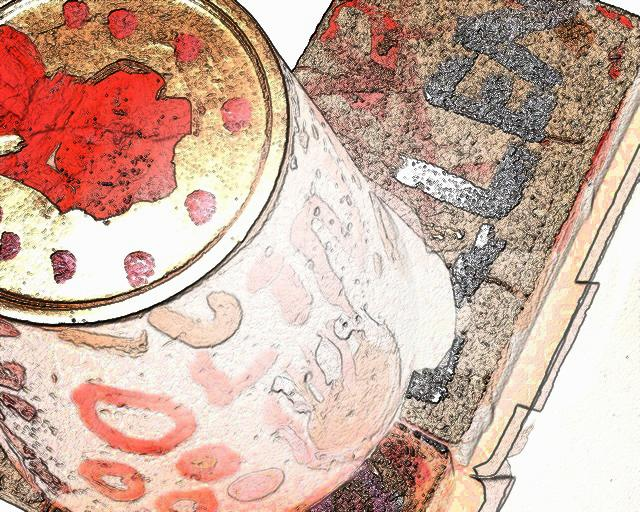

In [15]:
def add_virtual_light_source(file_path,output_path):
    from PIL import Image
    import numpy as np
    
    im = Image.open(file_path)
    # convert to hsv 
    img = im.convert('HSV')
    # split the image into h s v channels
    h, s, v = img.split()
    # convert to numpy array
    v1 = np.asarray(v).astype('float')

    
    depth = 10.0  # 设置深度值（0-100）
    grad = np.gradient(v1)  # 取图像灰度的梯度值
    grad_x, grad_y, *_ = grad  # 分别取横纵图像梯度值
    grad_x = grad_x * depth / 100
    grad_y = grad_y * depth / 100
    
    vec_el = np.pi / 2.2  # 光源的俯视角度，弧度值
    vec_az = np.pi / 4  # 光源的方位角度，弧度值
    dx = np.cos(vec_el) * np.cos(vec_az)  # 光源对x轴的影响
    dy = np.cos(vec_el) * np.sin(vec_az)  # 光源对y轴的影响
    dz = np.sin(vec_el)  # 光源对z轴的影响
    
    A = np.sqrt(grad_x**2 + grad_y**2 + 1.0)
    uni_x = grad_x / A
    uni_y = grad_y / A
    uni_z = 1.0 / A
    
    a2 = 255 * (dx * uni_x + dy * uni_y + dz * uni_z)  # 光源归一化
    a2 = a2.clip(0, 255)
    
    v2 = Image.fromarray(a2.astype('uint8'))  # 重构图像

    # convert hsv to rgb
    img = Image.merge('HSV', (h, s, v))
    img = img.convert('RGB')
    img.save(output_path)
    img.show()
add_virtual_light_source("/root/autodl-tmp/ViewDiff/viewdiff/data/dtu/test.jpg","/root/autodl-tmp/ViewDiff/viewdiff/data/dtu/test.jpg")
    




In [12]:
def adjust_brightness_and_contrast(output_path,file_path,alpha,beta):
    img = cv2.imread(file_path)
  
    #调整亮度和对比度
    output = img
    cv2.convertScaleAbs(img, output, alpha, beta)
    print(output)
    cv2.imwrite('test.png', output)
adjust_brightness_and_contrast('/root/autodl-tmp/ViewDiff/viewdiff/input.png','/root/autodl-tmp/ViewDiff/viewdiff/input.png',1,0)

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [255 255 255]
  ...
  [255 255 255]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [ 25  33  60]
  ...
  [248 252 253]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]
